# Auto MPG Data Set

* Objective : To predict MPG (Miles Per Gallon) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
# Download data set
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [4]:
# Rows and Columns
df.shape

(398, 8)

In [5]:
# Top 5 rows
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
# Bottom 5 rows
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [9]:
# Check missing values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
# Drop missing values
df = df.dropna()

In [10]:
# Check variable types
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [11]:
# Get unique values of Origin
df.Origin.unique() 

array([1, 3, 2], dtype=int64)

In [12]:
# Convert'Origin' column into one-hot
origin = df.pop('Origin')
df['USA'] = (origin == 1)*1
df['Europe'] = (origin == 2)*1
df['Japan'] = (origin == 3)*1

In [13]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [14]:
# Split the data into train and test
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [15]:
# Check shape of data
print(df.shape, train_df.shape, test_df.shape)

(392, 10) (314, 10) (78, 10)


In [16]:
# Descriptive statistics
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [17]:
# Descriptive statistics
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,78.0,23.991026,8.133563,9.0,18.00,24.00,29.875,44.3
Cylinders,78.0,5.448718,1.740633,3.0,4.00,4.00,8.000,8.0
Displacement,78.0,190.762821,106.494733,70.0,98.00,138.00,292.000,400.0
Horsepower,78.0,102.858974,40.255265,48.0,74.25,90.00,121.750,230.0
Weight,78.0,2926.589744,874.900416,1613.0,2159.50,2692.50,3706.500,4746.0
Acceleration,78.0,15.469231,2.649298,8.5,13.70,15.25,17.000,22.2
Model Year,78.0,76.307692,3.721847,70.0,73.00,76.00,79.750,82.0
USA,78.0,0.628205,0.486412,0.0,0.00,1.00,1.000,1.0
Europe,78.0,0.153846,0.363137,0.0,0.00,0.00,0.000,1.0
Japan,78.0,0.217949,0.415525,0.0,0.00,0.00,0.000,1.0


In [18]:
# Split features and labels
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [19]:
# Top 5 rows
train_features.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1


In [20]:
# Top 5 rows
train_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: MPG, dtype: float64

In [21]:
# Function to plot features 
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

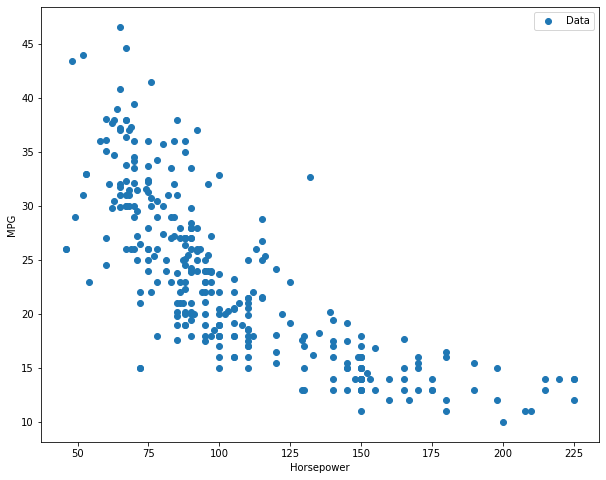

In [22]:
plot('Horsepower')

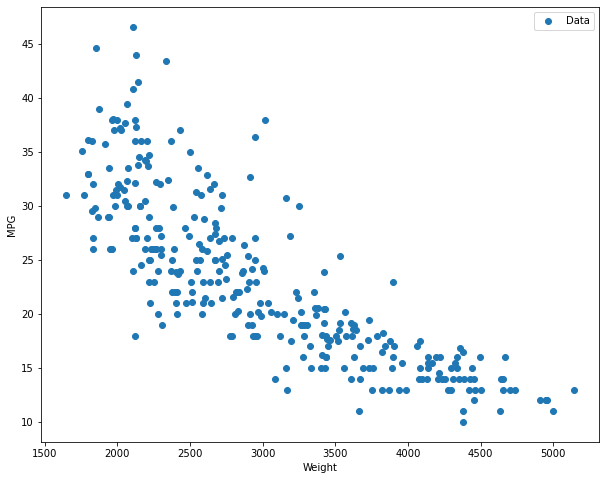

In [23]:
plot('Weight')

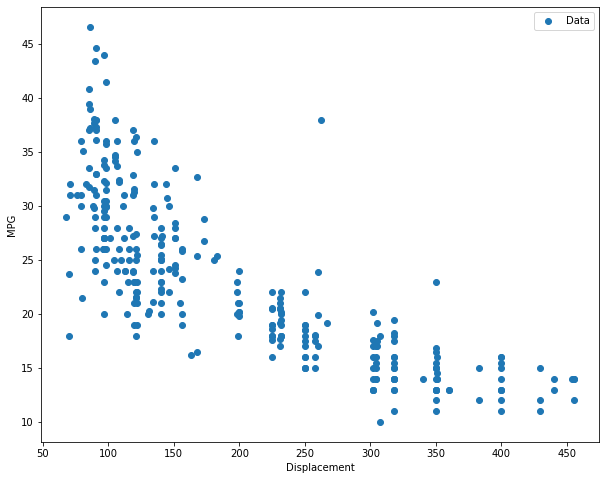

In [24]:
plot('Displacement')

In [25]:
# Mean and Std of training data
print(train_df.describe().transpose()[['mean', 'std']])

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712


In [30]:
# Normalize data
normalizer = preprocessing.Normalization()

# Apply adapt method
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
    0.197]


In [31]:
# First row of feature variables
train_features[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0


In [32]:
# Normalization of feature
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [33]:
# Regression model with one independent variable

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(314,) (314, 9)


In [34]:
# Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1)
])

In [35]:
# Summary of the model
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [36]:
# Define loss and optimizer
loss = keras.losses.MeanSquaredError() 
optim = keras.optimizers.Adam(lr=0.1)

# Compile model
single_feature_model.compile(optimizer=optim, loss=loss)

In [37]:
# Fit the model
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 55ms/step - loss: 594.1647 - val_loss: 594.8505
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 550.1140 - val_loss: 548.9996
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 507.2307 - val_loss: 506.9915
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 467.7529 - val_loss: 468.1420
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 432.0612 - val_loss: 431.7157
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 398.6758 - val_loss: 398.0338
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 366.5701 - val_loss: 367.7142
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 338.5451 - val_loss: 339.2692
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 311.9856 - val_loss: 313.1561
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 287.5711 - val_los

In [39]:
# Evaluate model
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 977us/step - loss: 20.8375


20.83747673034668

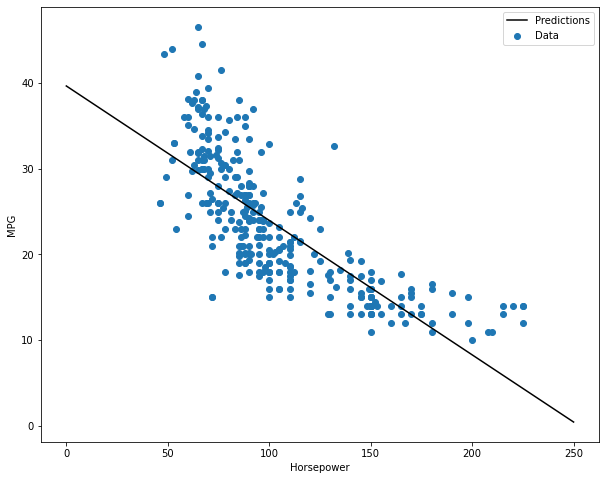

In [40]:
# Make prediction
x = tf.linspace(0,250, 250)
y = single_feature_model.predict(x)

# Plot actual vs predicted
plot(feature, x,y)

In [41]:
# Deep Neural Network
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [42]:
# Compile Model
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))



In [43]:
# Model summary
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [44]:
# Fit Model
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 30ms/step - loss: 590.8895 - val_loss: 609.7690
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 579.6852 - val_loss: 597.9647
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 568.0637 - val_loss: 584.5511
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 554.3322 - val_loss: 567.8337
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 536.0977 - val_loss: 545.7167
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 512.5186 - val_loss: 517.1407
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 482.6891 - val_loss: 482.4746
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 446.5825 - val_loss: 441.5141
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 404.8528 - val_loss: 394.5743
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 357.0797 - val_los

In [45]:
# Evaluate Model
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 1ms/step - loss: 13.1128


13.11279296875

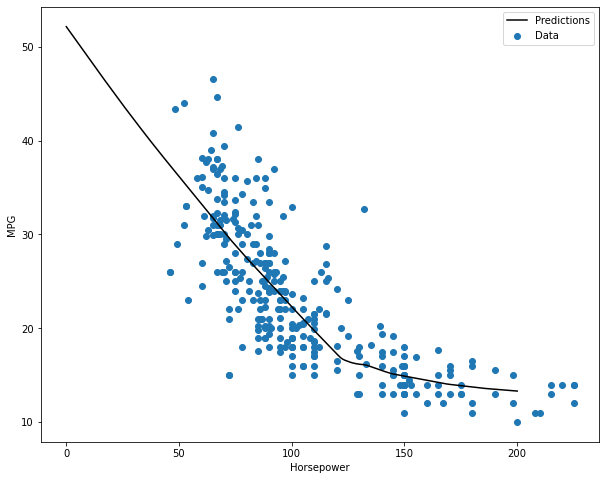

In [46]:
# Make prediction
x = tf.linspace(0, 200, 200)
y = dnn_model.predict(x)

# Plot
plot(feature, x,y)

In [48]:
# All independent variables
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [49]:
# Compile model
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [50]:
# Fit model
linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 36ms/step - loss: 575.9501 - val_loss: 559.0475
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 513.5965 - val_loss: 503.0951
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 469.4536 - val_loss: 469.9035
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 435.8425 - val_loss: 437.5851
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 404.6289 - val_loss: 409.9562
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 375.8745 - val_loss: 383.6265
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 344.9517 - val_loss: 355.5331
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 318.8936 - val_loss: 329.2754
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 294.1708 - val_loss: 304.8849
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 271.2590 - val_los

In [51]:
# Evaluate model
linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 10.5149


10.514923095703125